In [37]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (7, 5)
plt.rcParams["figure.dpi"] = 120

from sklearn.neighbors import KernelDensity



# Generating data
Using normal distribution (1-dimensional example)

In [2]:
DATA_SIZE = 10000

In [3]:
a = np.random.normal(2, 0.5, size=DATA_SIZE)
b = np.random.normal(5, 1, size=DATA_SIZE)

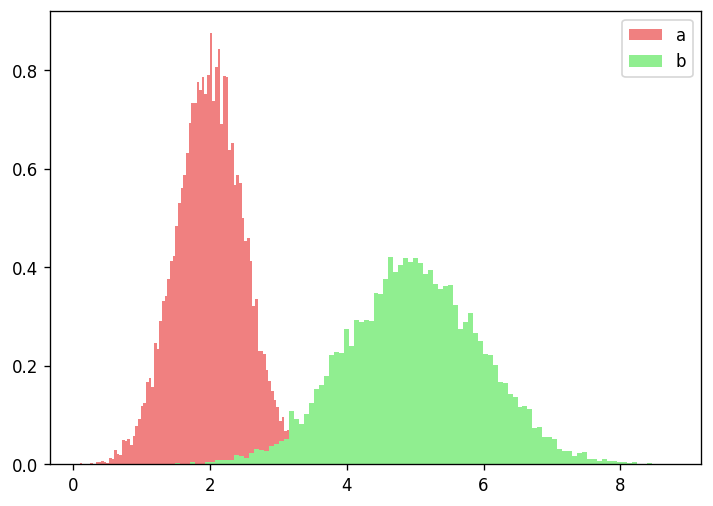

In [199]:
a_hist = plt.hist(a, bins=100, density=True, color='lightcoral')
b_hist = plt.hist(b, bins=100, density=True, color='lightgreen')
plt.legend(['a', 'b'])

(Text(0.5, 0, 'a'), Text(0, 0.5, 'b'))

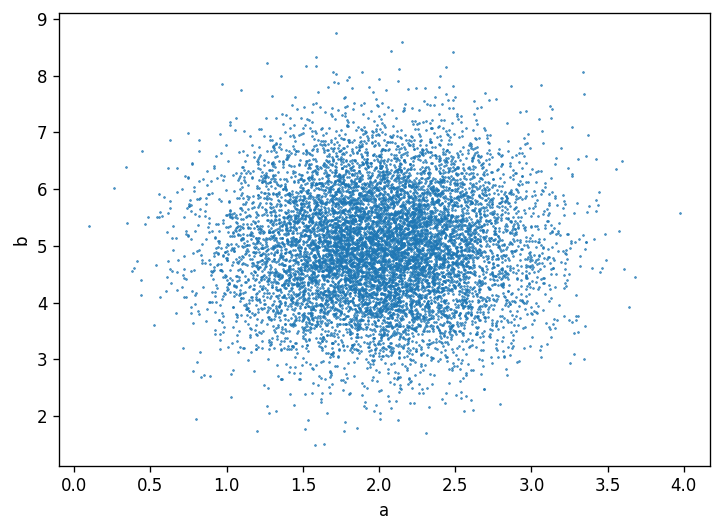

In [200]:
plt.plot(a, b, '.', markersize=1)
plt.xlabel('a'), plt.ylabel('b')

# Kernel density estimation
Let's estimate original distribution by kernel filtering

In [20]:
a_x, a_d = a_hist[1][:-1], a_hist[0]
b_x, b_d = b_hist[1][:-1], b_hist[0]

## Fixed size window for kernel estimation
- `window size = bandwidth = 0.2`
- `kernel = 'epanechnikov'`

In [168]:
kde = KernelDensity(bandwidth=0.05, kernel='epanechnikov')

In [169]:
a_data = a.reshape(-1, 1)
kde.fit(a_data)
log_dens_a = kde.score_samples(a_x.reshape(-1, 1))

b_data = b.reshape(-1, 1)
kde.fit(b_data)
log_dens_b = kde.score_samples(b_x.reshape(-1, 1))

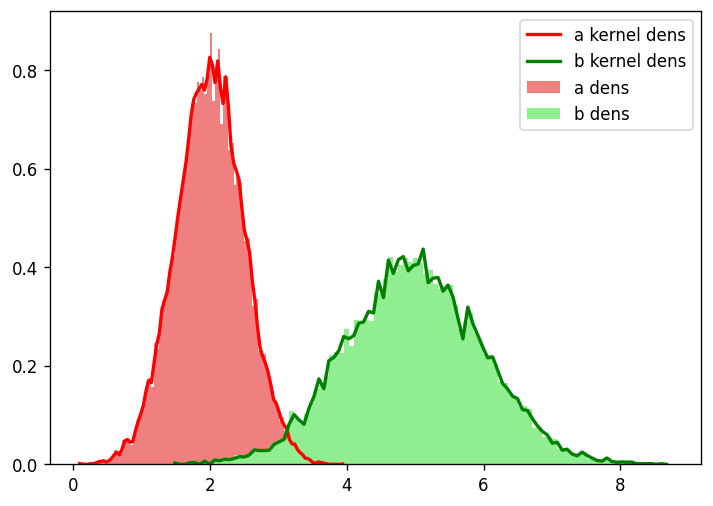

In [194]:
plt.plot(a_x, np.exp(log_dens_a), 'red', linewidth=2)
plt.hist(a, bins=100, density=True, color='lightcoral')

plt.plot(b_x, np.exp(log_dens_b), 'green', linewidth=2)
plt.hist(b, bins=100, density=True, color='lightgreen')

plt.legend(
    ['a kernel dens', 'b kernel dens', 'a dens', 'b dens'],
    loc='best',
)

## LOO window size estimation

### $LOO(h) = - \sum_{i=1}^{l}{\ln p_h(x_i, X^l \setminus x_i)} \rightarrow \min h$

In [152]:
def LOO(data, x_i, h, kernel='epanechnikov'):
    l = 0
    kde = KernelDensity(bandwidth=h, kernel=kernel)
    for i in range(len(x_i)):
        data_without_i = np.r_[data[:i], data[i+1:]]
        xi = data[i].reshape(-1, 1)
        kde.fit(data_without_i)
        p = -kde.score(xi)
#         print(f'i={i}, xi={xi}, s={s}, l={l}')
        l += p
    return l/len(x_i)

In [155]:
hs = np.linspace(1e-3, 2, 100)

score_a_epanechnikov = [LOO(a_data, a_x, h) for h in hs]
score_a_gaussian = [LOO(a_data, a_x, h, kernel='gaussian') for h in hs]

score_b_epanechnikov = [LOO(b_data, b_x, h) for h in hs]
score_b_gaussian = [LOO(a_data, a_x, h, kernel='gaussian') for h in hs]

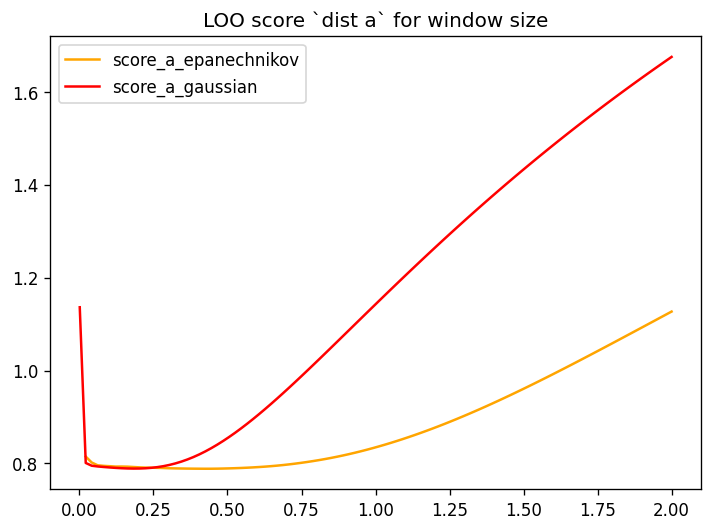

In [196]:
plt.plot(hs, score_a_epanechnikov, 'orange')
plt.plot(hs, score_a_gaussian, 'red')


plt.title('LOO score `dist a` for window size')
plt.legend(
    ['score_a_epanechnikov', 'score_a_gaussian'],
    loc='best',
)


Text(0.5, 1.0, 'LOO score `dist b` for window size')

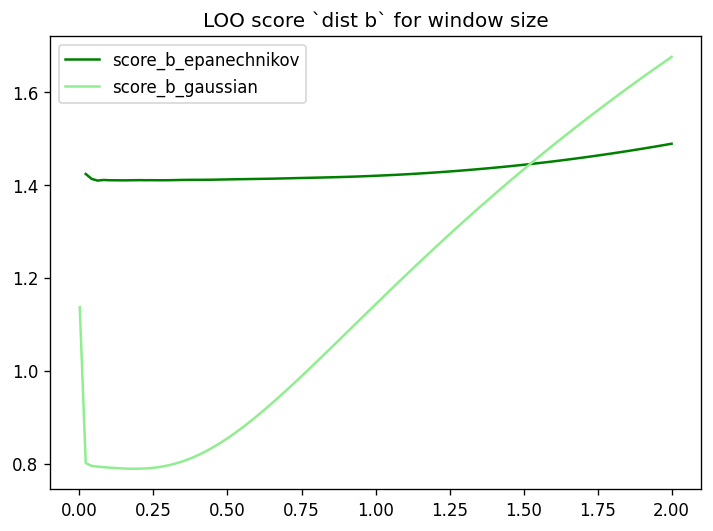

In [197]:
plt.plot(hs, score_b_epanechnikov, 'green')
plt.plot(hs, score_b_gaussian, 'lightgreen')

plt.legend(
    ['score_b_epanechnikov', 'score_b_gaussian'],
    loc='best',
)
plt.title('LOO score `dist b` for window size')

In [164]:
window_a = hs[np.argmin(score_a_epanechnikov)]
window_b = hs[np.argmin(score_b_gaussian)]

print('window size for a', h_a_argmin)
print('window size for b', h_b_argmin)

window size for a 0.42503030303030304
window size for b 0.18272727272727274


In [165]:
kde_a = KernelDensity(bandwidth=window_a, kernel='epanechnikov')
kde_b = KernelDensity(bandwidth=window_b, kernel='gaussian')

kde_a.fit(a_data)
kde_b.fit(b_data)

p_a = kde_a.score_samples(a_x.reshape(-1, 1))
p_b = kde_b.score_samples(b_x.reshape(-1, 1))

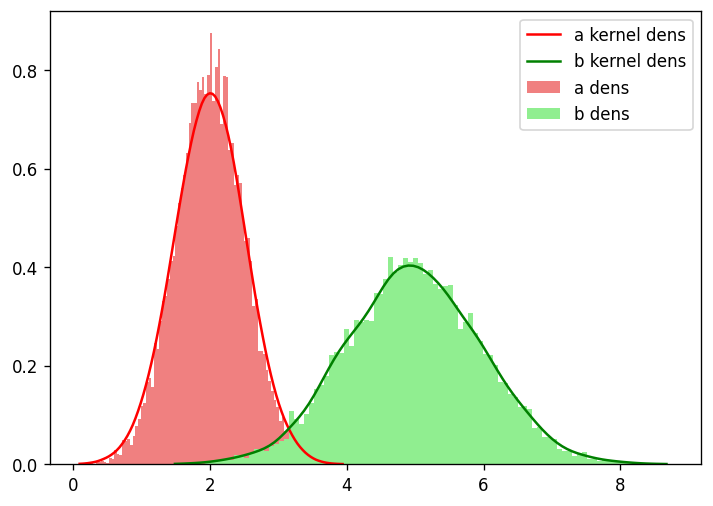

In [198]:
plt.plot(a_x, np.exp(p_a), 'red')
plt.hist(a, bins=100, density=True, color='lightcoral')

plt.plot(b_x, np.exp(p_b), 'green')
plt.hist(b, bins=100, density=True, color='lightgreen')

plt.legend(
    ['a kernel dens', 'b kernel dens', 'a dens', 'b dens'],
    loc='best',
)